In [1]:
# Adapted from https://github.com/rasmusab/bayesianprobabilitiesworkshop

Swedish Fish Incorporated is the largest Swedish company delivering fish by mail order. They are now trying to get into the lucrative Danish market by selling one year Salmon subscriptions. The marketing department have done a pilot study and tried the following marketing method:

A: Sending a mail with a colorful brochure that invites people to sign up for a one year salmon subscription.

The marketing department sent out 16 mails of type A. Six people that received a mail signed up for one year of salmon and marketing now wants to know, how good is method A?

Build a Bayesian model that answers the question: What would the rate of sign-up be if method A was used on a larger number of people?

In [2]:
import pandas as pd
import numpy as np

In [3]:
n_draws = 10000

# define the prior.  We have no prior information, so will use a uniform distribution
prior = pd.Series(np.random.uniform(0, 1, n_draws))  
prior.hist()

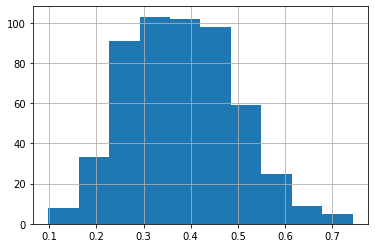

In [4]:
def generative_model(p):
    return(np.random.binomial(16,  p))

# simulate data using the parameters from the prior and the generative model
simulated_data = []
for p in prior:
    simulated_data.append(generative_model(p))
         
observed_data = 6
# only keep data that is consistent with the observed data
posterior = prior[list(map(lambda x: x == observed_data, simulated_data))]
posterior.hist() 

In [5]:
# summarize the posterior
print(' Posterior median: %.3f,  Posterior mean: %.3f, Posterior interval: %.3f-%.3f' % (posterior.median(), posterior.mean(), posterior.quantile(.025), posterior.quantile(.975)))

 Posterior median: 0.374,  Posterior mean: 0.381, Posterior interval: 0.183-0.621


Marketing just told us that the rate of sign-up would be 20% if salmon subscribers were snared by a telemarketing campaign instead. Given the model and the data that we developed in the last question, what’s the probability that method A has a higher rate of sign-up than telemarketing?

In [6]:
len(posterior[posterior > .2])/len(posterior)

0.9474671669793621

If method A was used on 100 people, what do you predict would be the number of sign-ups?

Median sign-up number: 38 95% 
Quantile interval: 15-63


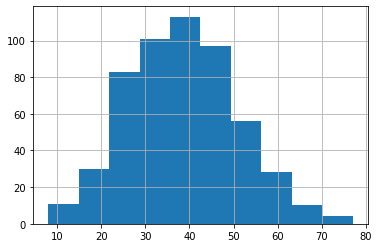

In [7]:
signups = []

for p in posterior:
    signups.append(np.random.binomial(100, p))
    
signups = pd.Series(signups)
signups.hist()
print('Median sign-up number: %d 95%% \nQuantile interval: %d-%d' %(signups.median(), signups.quantile([.025]).values[0], signups.quantile([.975]).values[0]))
